In [2]:
#SMSSpamCollection

import pandas as pd
import numpy as np
import sklearn as skl
import nltk
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the data set
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Drop last three columns
df=df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],axis=1)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [6]:
# Change the header of the column
df = df.rename(columns={"v1":"label", "v2":"message"})

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

[Text(0.5, 1.0, 'spam vs Ham in the total mail')]

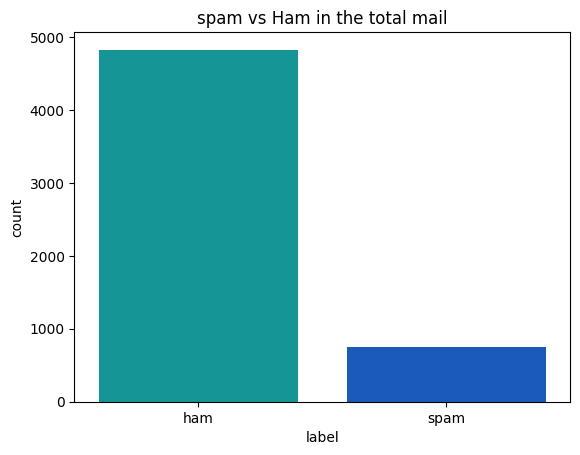

In [9]:
import seaborn as sns
sns.countplot(x= 'label',data=df, palette='winter_r').set(title='spam vs Ham in the total mail')


In [10]:
#Change the label to Zeros and ones using labels encoding techniques
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df['label'].shape

(5572,)

In [11]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#Checking the maximum length of text
print("data set contain" +" " + str(len(df['message']))+" "+ "Observation")

data set contain 5572 Observation


In [13]:
# Creatted the length of each observation
df['length']=df['message'].apply(len)
print(df.head())

   label                                            message  length
0      0  Go until jurong point, crazy.. Available only ...     111
1      0                      Ok lar... Joking wif u oni...      29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      0  U dun say so early hor... U c already then say...      49
4      0  Nah I don't think he goes to usf, he lives aro...      61


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

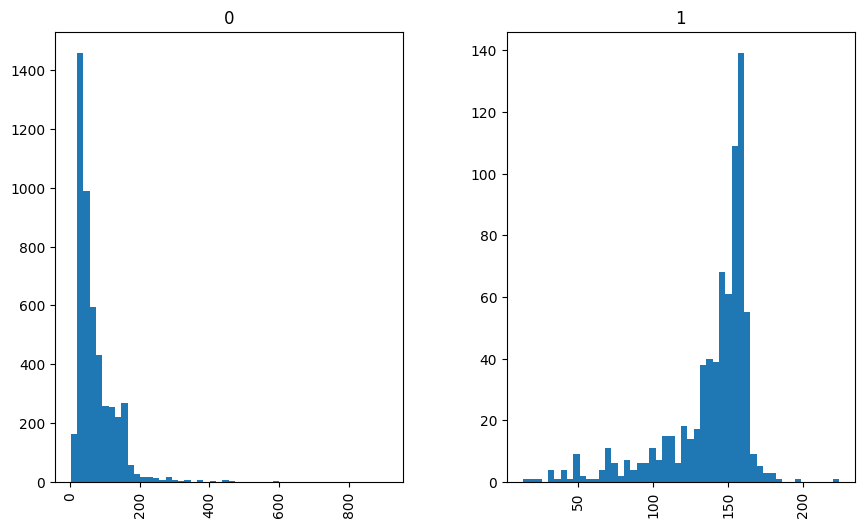

In [14]:
#Visiualization of the spam and ham 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df.hist(column='length', by='label', bins=50,figsize=(10,6))
#plt.title('length of mail')

In [15]:
# store the text
text= df['message']
print(text[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: message, dtype: object


In [16]:
# Replace email addresses with 'email'
processed = text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

import re #Regular expression library

#Download the English stopwords from nltk library
nltk.download('stopwords')

from nltk.corpus import stopwords

# Apply the stemming process to the text
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', processed[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fliprise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#Data cleaning and preprocessing
import re
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', processed[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fliprise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
print(corpus[:15])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
all_word = []
for i in corpus:
    words = word_tokenize(i)
    for ii in words:
        all_word.append(ii)

all_word2 = nltk.FreqDist(all_word)

print('Most common words: {}'.format(all_word2.most_common(15)))

[nltk_data] Downloading package punkt to /Users/fliprise/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words: [('u', 1212), ('call', 693), ('go', 459), ('get', 458), ('ur', 385), ('gt', 318), ('lt', 316), ('come', 302), ('ok', 292), ('day', 291), ('free', 288), ('know', 274), ('love', 260), ('like', 259), ('time', 253)]


In [20]:
print("Length of all word is" + " " + str(len(all_word)))

Length of all word is 50045


In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
wc=WordCloud()
#word_cloud=wc.generate(all_word)

In [22]:
from collections import Counter
count_word=Counter(all_word)
print(count_word)

Counter({'u': 1212, 'call': 693, 'go': 459, 'get': 458, 'ur': 385, 'gt': 318, 'lt': 316, 'come': 302, 'ok': 292, 'day': 291, 'free': 288, 'know': 274, 'love': 260, 'like': 259, 'time': 253, 'got': 252, 'want': 246, 'good': 246, 'text': 233, 'send': 213, 'txt': 197, 'need': 189, 'p': 188, 'one': 184, 'today': 181, 'n': 174, 'take': 173, 'see': 172, 'r': 171, 'stop': 171, 'home': 167, 'think': 166, 'repli': 164, 'lor': 162, 'k': 160, 'sorri': 160, 'tell': 158, 'still': 157, 'mobil': 157, 'back': 153, 'da': 152, 'make': 148, 'dont': 144, 'phone': 142, 'week': 141, 'say': 139, 'pleas': 139, 'hi': 138, 'new': 136, 'work': 135, 'pl': 135, 'later': 135, 'hope': 133, 'ask': 133, 'co': 132, 'miss': 131, 'msg': 131, 'min': 129, 'meet': 128, 'c': 126, 'messag': 125, 'dear': 125, 'night': 122, 'wait': 121, 'happi': 120, 'well': 119, 'thing': 117, 'great': 116, 'much': 116, 'claim': 115, 'oh': 114, 'tri': 114, 'give': 114, 'wat': 113, 'hey': 112, 'number': 110, 'na': 109, 'b': 108, 'friend': 107, '

In [23]:
# use the 2000 most common words as features
word_features = list(all_word2.keys())[:2000]

print("The most 2000 common words are : " + str(word_features[:15]))

The most 2000 common words are : ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor']


In [24]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [25]:
# Now lets do it for all the messages
messages = zip(corpus, df['label'])
np.random.seed = 1
#np.random.shuffle(messages)

# Feed the message in to the find_features
feature_set = [(find_features(text), label) for (text, label) in messages]

In [26]:
# we can split the feature_set into training and testing data as using sklearn
from sklearn import model_selection
training, testing = model_selection.train_test_split(feature_set, test_size = 0.25, random_state=2)
print("Training data set contain " + " " + str(len(training))+ " "+ "Observation")
print("Testing data set contain  " + " " + str(len(testing))+ " "+ "Observation")

Training data set contain  4179 Observation
Testing data set contain   1393 Observation


In [27]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 98.06173725771716


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [29]:
# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 92.03158650394832
Decision Tree Accuracy: 97.20028715003589
Random Forest Accuracy: 97.27207465900933
Logistic Regression Accuracy: 97.91816223977028
SGD Classifier Accuracy: 97.84637473079684
Naive Bayes Accuracy: 97.48743718592965
SVM Linear Accuracy: 98.06173725771716
